Class Label Mapping:
ADHD -> 0
depression -> 1
not diagnosed -> 2

Naive Bayes with CountVectorizer
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.94      0.78      2980
           1       0.83      0.64      0.72      2985
           2       0.83      0.69      0.76      3019

    accuracy                           0.76      8984
   macro avg       0.78      0.76      0.75      8984
weighted avg       0.78      0.76      0.75      8984



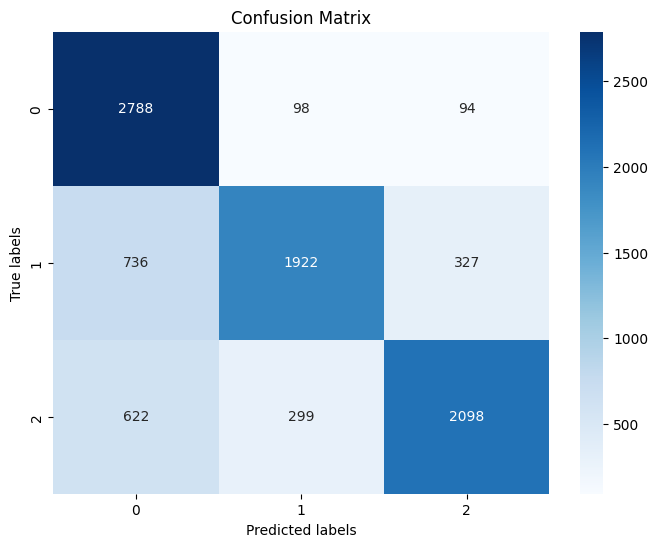


Naive Bayes with TfidfVectorizer
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.92      0.79      2980
           1       0.79      0.71      0.75      2985
           2       0.86      0.67      0.75      3019

    accuracy                           0.77      8984
   macro avg       0.78      0.77      0.76      8984
weighted avg       0.78      0.77      0.76      8984



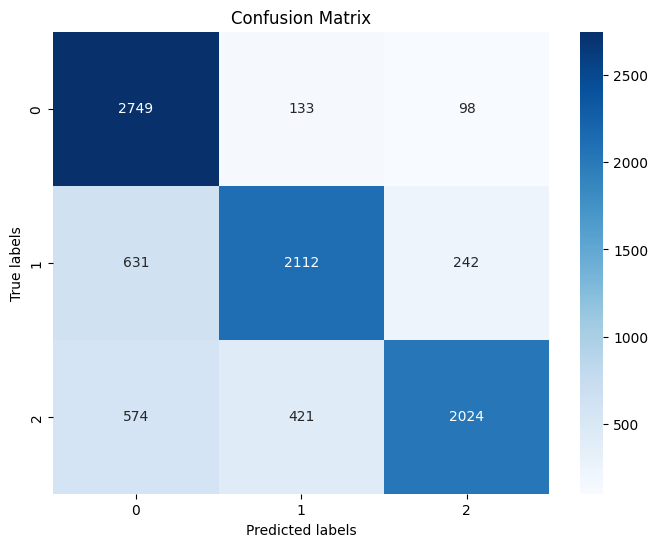


MLP with CountVectorizer
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2980
           1       0.72      0.75      0.73      2985
           2       0.77      0.73      0.75      3019

    accuracy                           0.76      8984
   macro avg       0.76      0.76      0.76      8984
weighted avg       0.76      0.76      0.76      8984



c:\Users\death\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


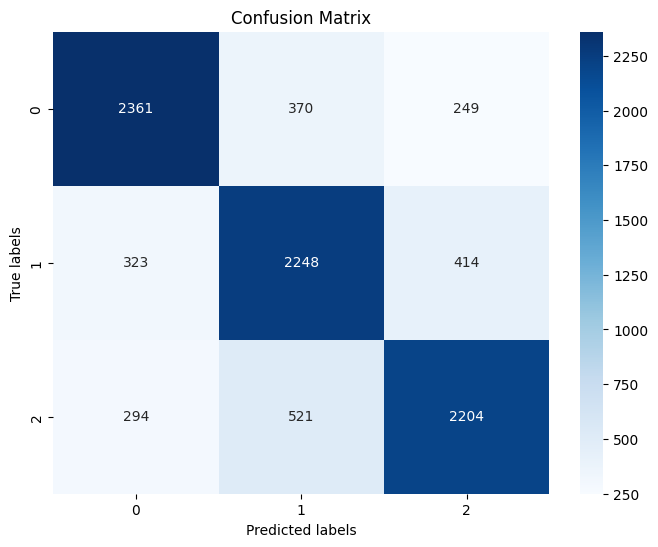


MLP with TfidfVectorizer
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2980
           1       0.75      0.75      0.75      2985
           2       0.81      0.72      0.76      3019

    accuracy                           0.77      8984
   macro avg       0.77      0.77      0.77      8984
weighted avg       0.77      0.77      0.77      8984



c:\Users\death\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


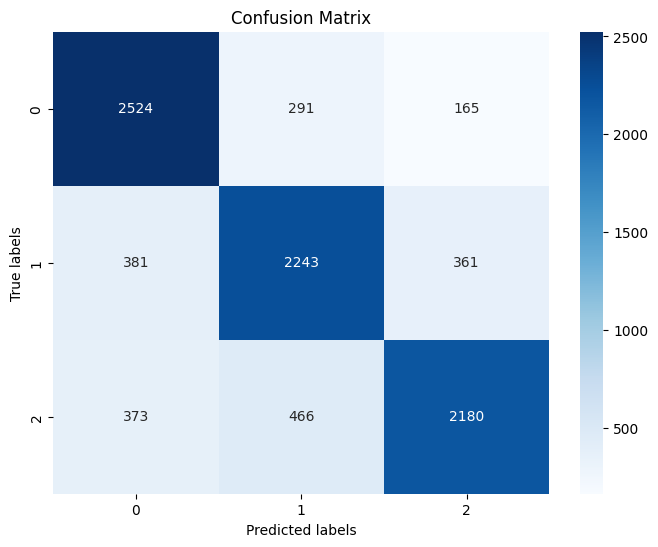


Logistic Regression with CountVectorizer
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2980
           1       0.73      0.73      0.73      2985
           2       0.77      0.74      0.76      3019

    accuracy                           0.76      8984
   macro avg       0.76      0.76      0.76      8984
weighted avg       0.76      0.76      0.76      8984



c:\Users\death\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


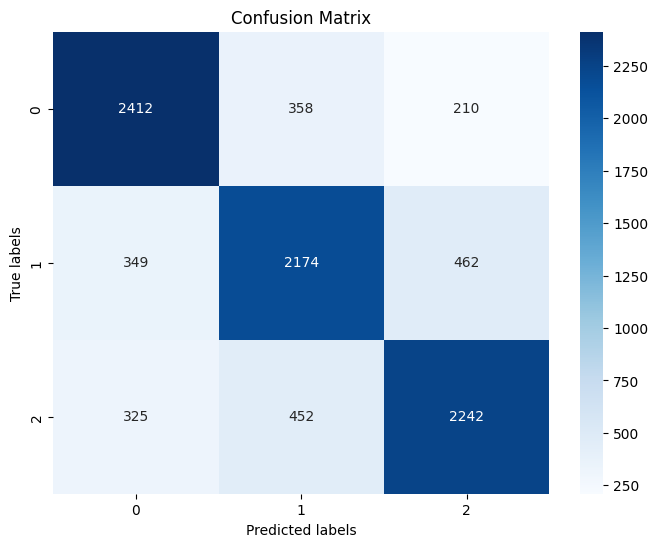


Logistic Regression with TfidfVectorizer
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2980
           1       0.78      0.69      0.73      2985
           2       0.77      0.75      0.76      3019

    accuracy                           0.77      8984
   macro avg       0.77      0.77      0.76      8984
weighted avg       0.77      0.77      0.76      8984



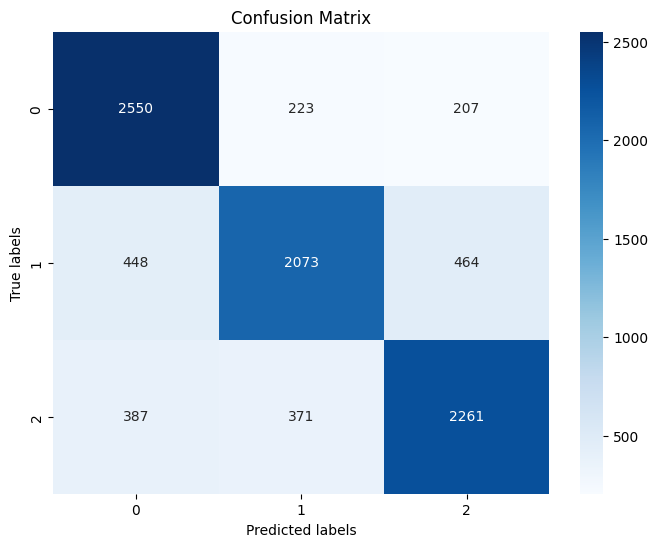

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('preprocessed_data.csv')

# Remove rows with null values
df.dropna(subset=['post_text'], inplace=True)

# Prepare data
X = df['post_text']
y = df['label']  # Assuming 'class' column contains class labels

# Encode labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Print class label mapping
print("Class Label Mapping:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"{label} -> {idx}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate and visualize a model
def evaluate_and_visualize_model(model, vectorizer_type, X_train, X_test, y_train, y_test):
    # Fit the vectorizer on the training data
    if vectorizer_type == 'count':
        vectorizer = CountVectorizer()
    elif vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer()
    else:
        raise ValueError("Invalid vectorizer type. Choose 'count' or 'tfidf'.")
    
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    
    # Train the model
    model.fit(X_train_vect, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_vect)
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    
    # ROC Curve for binary classification
    if len(set(y_train)) == 2:  # Check if binary classification
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label='ROC Curve')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

# Models to evaluate
models = {
    "Naive Bayes with CountVectorizer": MultinomialNB(),
    "Naive Bayes with TfidfVectorizer": MultinomialNB(),
    "MLP with CountVectorizer": MLPClassifier(),
    "MLP with TfidfVectorizer": MLPClassifier(),
    "Logistic Regression with CountVectorizer": LogisticRegression(),
    "Logistic Regression with TfidfVectorizer": LogisticRegression()
}

# Evaluate and visualize each model
for name, model in models.items():
    print(f"\n{name}")
    vectorizer_type = 'count' if 'Count' in name else 'tfidf'
    evaluate_and_visualize_model(model, vectorizer_type, X_train, X_test, y_train, y_test)
